# NumPy IO

Numpy 可以读写磁盘上的文本数据或二进制数据。

NumPy 为 ndarray 对象引入了一个简单的文件格式：npy。

npy 文件用于存储重建 ndarray 所需的数据、图形、dtype 和其他信息。

常用的 IO 函数有：

load() 和 save() 函数是读写文件数组数据的两个主要函数，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 .npy 的文件中。
savez() 函数用于将多个数组写入文件，默认情况下，数组是以未压缩的原始二进制格式保存在扩展名为 .npz 的文件中。
loadtxt() 和 savetxt() 函数处理正常的文本文件(.txt 等)
numpy.save()
numpy.save() 函数将数组保存到以 .npy 为扩展名的文件中。

numpy.save(file, arr, allow_pickle=True, fix_imports=True)
参数说明：

file：要保存的文件，扩展名为 .npy，如果文件路径末尾没有扩展名 .npy，该扩展名会被自动加上。
arr: 要保存的数组
allow_pickle: 可选，布尔值，允许使用 Python pickles 保存对象数组，Python 中的 pickle 用于在保存到磁盘文件或从磁盘文件读取之前，对对象进行序列化和反序列化。
fix_imports: 可选，为了方便 Pyhton2 中读取 Python3 保存的数据。







numpy.save()和numpy.savetxt()都可以用于将数组保存到文件中，但它们有以下区别：

numpy.save()保存的是二进制文件，后缀名是.npy，而numpy.savetxt()保存的是文本文件，可以指定后缀名（如.txt）。

numpy.save()只能保存一个数组。而numpy.savetxt()只能保存一个数组。

numpy.save()保存的文件可以使用numpy.load()进行读取，而numpy.savetxt()保存的文件可以使用numpy.loadtxt()进行读取。

numpy.save()保存的文件占用空间较小，读写速度较快，适合于保存大型数组；而numpy.savetxt()保存的文件占用空间较大，读写速度较慢，适合于保存小型数组或需要人工查看的数据。

numpy.savetxt()支持指定分隔符、格式、行结束符等参数，可以更灵活地控制输出格式。而numpy.save()没有这些参数，输出格式是固定的。




使用 numpy.save() 函数时，若指定的文件名已经存在，将会被覆盖。而 numpy.savez() 函数在文件名已存在的情况下，会自动为新的文件添加一个数字后缀以避免覆盖之前的文件。

In [31]:
import numpy as np 
a=np.array([1,2,3,4,5])

# 保存到outfile.npy文件上
np.save("outfile.npy",a)

np.save("outfile2",a)


# 出现了内容覆盖，输入的两个数组被保存到同一个数组
c = np.array([1, 2, 3])
b = np.array([4, 5, 6])

np.save('outfile.npy', (c, b))


我们可以查看文件内容：

$ cat outfile.npy 
?NUMPYv{'descr': '<i8', 'fortran_order': False, 'shape': (5,), }  
$ cat outfile2.npy 
?NUMPYv{'descr': '<i8', 'fortran_order': False, 'shape': (5,), } 
可以看出文件是乱码的，因为它们是 Numpy 专用的二进制格式后的数据。

我们可以使用 load() 函数来读取数据就可以正常显示了：

In [32]:
b = np.load('outfile.npy')  
print (b)

[[1 2 3]
 [4 5 6]]


np.savez
numpy.savez() 函数将多个数组保存到以 npz 为扩展名的文件中。

numpy.savez(file, *args, **kwds)
参数说明：

file：要保存的文件，扩展名为 .npz，如果文件路径末尾没有扩展名 .npz，该扩展名会被自动加上。
args: 要保存的数组，可以使用关键字参数为数组起一个名字，非关键字参数传递的数组会自动起名为 arr_0, arr_1, …　。
kwds: 要保存的数组使用关键字名称。

In [33]:
a = np.array([[1,2,3],[4,5,6]])
b = np.arange(0, 1.0, 0.1)
c=np.sin(b)
# c 使用了关键字参数 sin_array
np.savez("runoob.npz",a,b,sin_array=c)
r=np.load("runoob.npz")
print(r.files) # 查看各个数组名称
print(r["arr_0"]) # 数组 a
print(r["arr_1"]) # 数组 b
print(r["sin_array"]) # 数组 c
print(np.load("runoob.npz"))


['sin_array', 'arr_0', 'arr_1']
[[1 2 3]
 [4 5 6]]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.         0.09983342 0.19866933 0.29552021 0.38941834 0.47942554
 0.56464247 0.64421769 0.71735609 0.78332691]


savetxt()
savetxt() 函数是以简单的文本文件格式存储数据，对应的使用 loadtxt() 函数来获取数据。

np.loadtxt(FILENAME, dtype=int, delimiter=' ')
np.savetxt(FILENAME, a, fmt="%d", delimiter=",")
参数 delimiter 可以指定各种分隔符、针对特定列的转换器函数、需要跳过的行数等。

In [34]:
a=np.array([1,2,3,4,5])
np.savetxt("out.txt",a)
b=np.loadtxt("out.txt")
print(b)

[1. 2. 3. 4. 5.]


这就是存储格式：
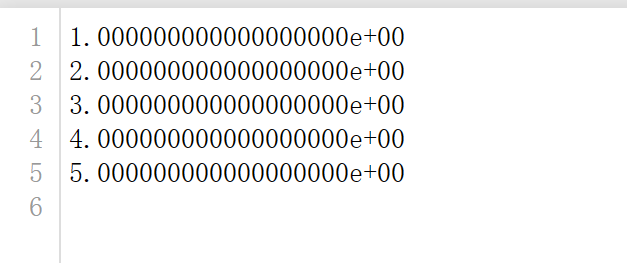

In [35]:
# reshape(4, -1) 把一维的数组重新排列成4行5列的二维数组，行数是指定的4，而列数由-1自动计算得出，
# -1表示让NumPy自动计算。因此，这一步将一维数组变成了4行5列的二维数组
a=np.arange(0,10,0.5).reshape(4,-1)
# 覆盖原先的内容
np.savetxt("out.txt",a,fmt="%d",delimiter=",") # 改为保存为整数，每个元素以逗号分隔
b = np.loadtxt("out.txt",delimiter=",") # load 时也要指定为逗号分隔
print(b)
# 可以看到输出的数组中仍然包含小数，这是因为在保存文件时使用了 "%d" 格式化字符串，
# 这会把小数截断为整数，但在读取文件时使用的是默认的 float 类型，所以仍然保留了小数。
# 如果想要保留整数的话，可以在读取文件时指定数据类型为 int，代码如下：
b = np.loadtxt("out.txt", delimiter=",", dtype=int)
print(b)

[[0. 0. 1. 1. 2.]
 [2. 3. 3. 4. 4.]
 [5. 5. 6. 6. 7.]
 [7. 8. 8. 9. 9.]]
[[0 0 1 1 2]
 [2 3 3 4 4]
 [5 5 6 6 7]
 [7 8 8 9 9]]


存储格式：
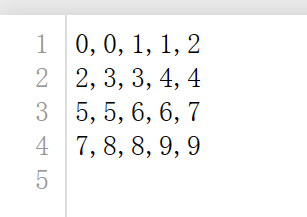

如果文件已经存在，使用np.savetxt()函数写入数据时会默认覆盖原来的内容。

In [39]:
b = np.array([[7,8,9], [10,11,12]])
with open('out.txt', 'a') as f:
    np.savetxt(f, b, fmt="%d",delimiter=',')
# 从文件中读取数据
a = np.loadtxt("out.txt", delimiter=",", max_rows=4)
print(a)
b = np.loadtxt("out.txt", delimiter=",", skiprows=4)
print(b)

[[0. 0. 1. 1. 2.]
 [2. 3. 3. 4. 4.]
 [5. 5. 6. 6. 7.]
 [7. 8. 8. 9. 9.]]
[[ 7.  8.  9.]
 [10. 11. 12.]
 [ 7.  8.  9.]
 [10. 11. 12.]
 [ 7.  8.  9.]
 [10. 11. 12.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


它包含两个不同的数组，每个数组的列数不同。因此，当使用np.loadtxt()加载数据时，您需要指定要加载的行数和列数。

请注意，如果第二个数组的列数与第一个数组的列数不同，np.loadtxt()函数将引发错误。